In [4]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [5]:
%pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [ ]:
data = r'C:\Users\ioana\an IV sem I\AI-powered-firewall\HackTheFuture\MachineLearningCVE\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv '
df = pd.read_csv(data)

In [7]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [9]:
df.isna().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [10]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [11]:
df.columns = df.columns.str.strip()

In [12]:
df['Label'].value_counts()

Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64

In [13]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [14]:
X = df.drop(['Label'], axis=1)

In [15]:
y = df['Label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoder = le.fit_transform(y)

In [18]:
import numpy as np
import pandas as pd

print("NaN totale:", np.isnan(X_train).sum())
print("Inf totale:", np.isinf(X_train).sum())

print("Max value:", np.nanmax(X_train))
print("Min value:", np.nanmin(X_train))


NaN totale: Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64
Inf totale: Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64
Max value: inf
Min value: -12000000.0


In [19]:
np.isinf(X).sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64

In [20]:
rows, cols = np.where(np.isinf(X_train))
print("Total number infinite values:", len(rows))
print("First locations:", list(zip(rows, X_train.columns[cols])))



Total number infinite values: 45
First locations: [(np.int64(13706), 'Flow Bytes/s'), (np.int64(13706), 'Flow Packets/s'), (np.int64(19726), 'Flow Bytes/s'), (np.int64(19726), 'Flow Packets/s'), (np.int64(27767), 'Flow Bytes/s'), (np.int64(27767), 'Flow Packets/s'), (np.int64(33265), 'Flow Bytes/s'), (np.int64(33265), 'Flow Packets/s'), (np.int64(37849), 'Flow Bytes/s'), (np.int64(37849), 'Flow Packets/s'), (np.int64(39366), 'Flow Bytes/s'), (np.int64(39366), 'Flow Packets/s'), (np.int64(43130), 'Flow Packets/s'), (np.int64(43681), 'Flow Bytes/s'), (np.int64(43681), 'Flow Packets/s'), (np.int64(54820), 'Flow Packets/s'), (np.int64(59941), 'Flow Bytes/s'), (np.int64(59941), 'Flow Packets/s'), (np.int64(66005), 'Flow Bytes/s'), (np.int64(66005), 'Flow Packets/s'), (np.int64(79890), 'Flow Bytes/s'), (np.int64(79890), 'Flow Packets/s'), (np.int64(91620), 'Flow Bytes/s'), (np.int64(91620), 'Flow Packets/s'), (np.int64(95233), 'Flow Bytes/s'), (np.int64(95233), 'Flow Packets/s'), (np.int64(1

In [21]:
print("Before drop:")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
inf_rows_train = np.isinf(X_train).any(axis=1)
print(f"Rows with inf in train: {inf_rows_train.sum()}")

inf_rows_test = np.isinf(X_test).any(axis=1)
print(f"Rows inf in test: {inf_rows_test.sum()}")

X_train = X_train[~inf_rows_train]
y_train = y_train[~inf_rows_train]

X_test = X_test[~inf_rows_test]
y_test = y_test[~inf_rows_test]

print("After drop:")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")



Before drop:
Train shape: (158021, 78), Test shape: (67724, 78)
Rows with inf in train: 24
Rows inf in test: 10
After drop:
Train shape: (157997, 78), Test shape: (67714, 78)


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
classifier = RandomForestClassifier(n_estimators=101, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Accuracy: 99.99%


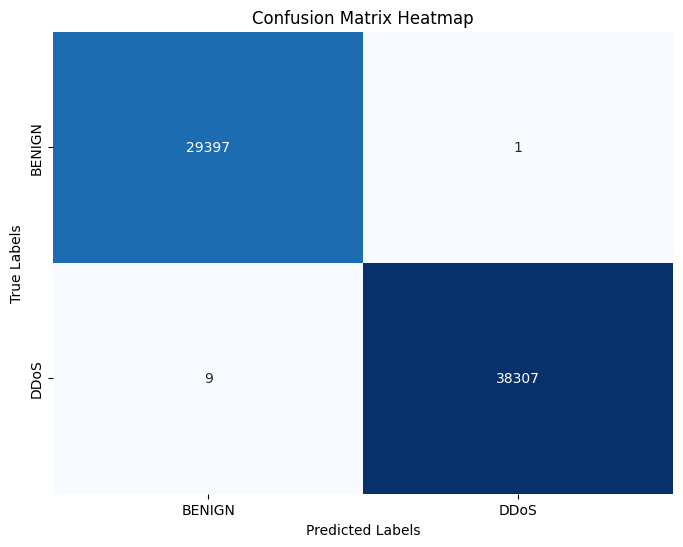

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

labels = sorted(list(set(y_test)))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     29398
        DDoS       1.00      1.00      1.00     38316

    accuracy                           1.00     67714
   macro avg       1.00      1.00      1.00     67714
weighted avg       1.00      1.00      1.00     67714



In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.9998860733455354


In [27]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(classifier)

# Load the pickled model
classifier_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
y_pred_from_pickle = classifier_from_pickle.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred_from_pickle)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 99.99%


In [29]:
from joblib import Parallel, delayed
import joblib


# Save the model as a pickle in a file
joblib.dump(classifier, 'classifier.pkl')
joblib.dump(classifier, 'classifier_joblib.joblib')



['classifier_joblib.joblib']

In [30]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # sau MinMaxScaler, daca ai folosit
    ('clf', RandomForestClassifier(n_estimators=101, random_state=0))
])

# Antrenare pipeline
pipeline.fit(X_train, y_train)

joblib.dump(pipeline, "model_pipeline.joblib")

['model_pipeline.joblib']

In [31]:
features_used = list(X.columns)
joblib.dump(features_used, "features_used_joblib.joblib")

['features_used_joblib.joblib']